In [1]:
pip install einops

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 52.6 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 77.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 85.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 13.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 44.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 68.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 37.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 16.4 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
import torchvision
import torchvision.transforms as transforms

# Define the transform to convert the data to a torch.Tensor
transform = transforms.Compose([transforms.ToTensor()])

# Download and load the training data
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Download and load the test data
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

29.1%

100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100.0%

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100.0%

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




100.0%


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [6]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Define the transform to convert the data to a torch.Tensor
transform = transforms.ToTensor()

# Download and load the full MNIST dataset
full_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Extract the first 1000 samples
subset_dataset = torch.utils.data.Subset(full_dataset, range(1000))

# Extract the class labels for the subset
subset_labels = torch.tensor([sample[1] for sample in subset_dataset])

# Reshape the images to 28*28 pixels
subset_images = torch.stack([sample[0].view(28, 28) for sample in subset_dataset])

In [11]:
#2.1 task 2
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.9/158.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 93.0 MB/s eta 0:00:000m eta 0:00:0136m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.9/303.9 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 127.1 MB/s eta 0:00:00m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 7.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


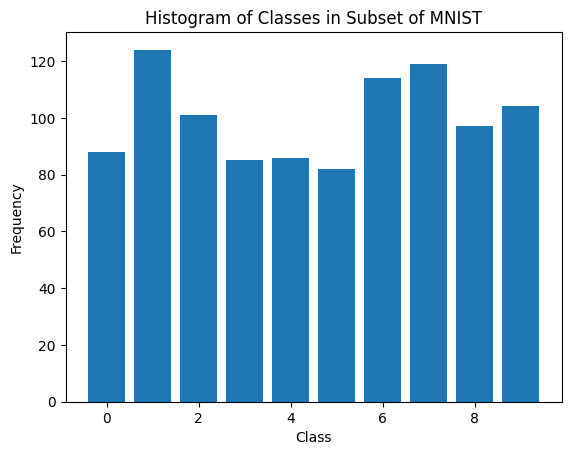

torch.Size([40, 25, 1, 28, 28, 1])


In [56]:
import torch
from torchvision import datasets, transforms
from einops import rearrange

# Download MNIST dataset and create a subset
transform = transforms.Compose([
    transforms.ToTensor(),
])

mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
subset_indices = torch.randint(0, len(mnist_dataset), (1000,))
subset = torch.utils.data.Subset(mnist_dataset, subset_indices)

# Plot histogram of classes
import matplotlib.pyplot as plt

classes = [sample[1] for sample in subset]
plt.hist(classes, bins=range(11), align='left', rwidth=0.8)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Histogram of Classes in Subset of MNIST')
plt.show()

# Batch the subset of MNIST images
batch_size = 25
subset_loader = torch.utils.data.DataLoader(subset, batch_size=batch_size)

# Rearrange to desired shape
batches = []
for images, labels in subset_loader:
     #images shape: [batch_size, 1, 28, 28]
    images = rearrange(images, 'b c h w -> b h w c')  # Move channel dimension to the end
    images = images.unsqueeze(1)  # Add a singleton dimension for channels 
    batches.append(images)

batches = torch.stack(batches)  # Concatenate into a single tensor
print(batches.shape)  # Output should be [Number of Batches, Batch Size, 1, 28, 28]


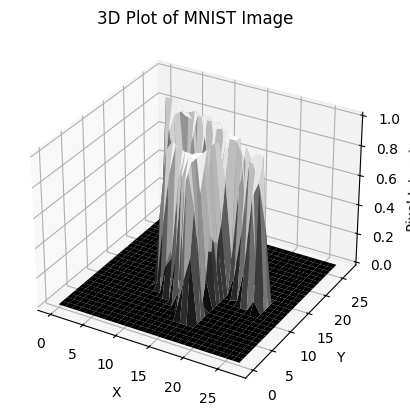

In [97]:
import torch
import matplotlib.pyplot as plt
#load the subset of MNIST images
subset_images=torch.load('subset_images.pt')
# Randomly select an image sample
random_index = torch.randint(0, len(subset_images), size=(1,))
selected_image = subset_images[random_index]

# Convert the selected image to a single-channel image
#selected_image = selected_image.unsqueeze(0)

# Create x and y coordinates for each pixel
x = torch.arange(28)
y = torch.arange(28)
xv, yv = torch.meshgrid(x, y)

# Plot the image in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Reshape x and y to match the dimensions of the selected image
x = x.view(28, 1)
y = y.view(1, 28)
#ax.plot_surface(xv, yv, selected_image.numpy(), cmap='gray')
ax.plot_surface(x, y, selected_image.numpy().squeeze(), cmap='gray')

# Set the axes labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Pixel Intensity')
ax.set_title('3D Plot of MNIST Image')

# Show the plot
plt.show()

In [101]:
pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 128.1 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 40.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [103]:
!wget https://github.com/LuisM78/Appliances-energy-prediction-data/blob/master/energydata_complete.csv


--2024-02-14 02:35:32--  https://github.com/LuisM78/Appliances-energy-prediction-data/blob/master/energydata_complete.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6460 (6.3K) [text/plain]
Saving to: ‘energydata_complete.csv’

energydata_complete 100%[===================>]   6.31K  --.-KB/s    in 0s      

2024-02-14 02:35:32 (111 MB/s) - ‘energydata_complete.csv’ saved [6460/6460]



In [128]:
# Print the data types of each column
energy_data.dtypes


{"payload":{"allShortcutsEnabled":false                                                                                                                                 object
fileTree:{"":{"items":[{"name":"Appliances_histogram_boxplot2_Jan29.png"                                                                                                object
path:"Appliances_histogram_boxplot2_Jan29.png"                                                                                                                          object
contentType:"file"}                                                                                                                                                     object
{"name":"Appliances_profile_3_Jan29.png"                                                                                                                                object
                                                                                                                             

In [129]:
# Check for missing values in each column
energy_data.isnull().sum()

{"payload":{"allShortcutsEnabled":false                                                                                                                                 0
fileTree:{"":{"items":[{"name":"Appliances_histogram_boxplot2_Jan29.png"                                                                                                0
path:"Appliances_histogram_boxplot2_Jan29.png"                                                                                                                          0
contentType:"file"}                                                                                                                                                     0
{"name":"Appliances_profile_3_Jan29.png"                                                                                                                                0
                                                                                                                                                      

In [130]:
# Print descriptive statistics of the numerical columns
energy_data.describe()

,"{""payload"":{""allShortcutsEnabled"":false","fileTree:{"""":{""items"":[{""name"":""Appliances_histogram_boxplot2_Jan29.png""","path:""Appliances_histogram_boxplot2_Jan29.png""","contentType:""file""}","{""name"":""Appliances_profile_3_Jan29.png""","path:""Appliances_profile_3_Jan29.png""","contentType:""file""}.1","{""name"":""Borutaplot_Jan31_2017.png""","path:""Borutaplot_Jan31_2017.png""","contentType:""file""}.2",...,not_analyzed:true,symbols:[],"error:{""code"":""invalid_argument""","msg:""content required""",meta:{}}}},copilotInfo:null,copilotAccessAllowed:false,"csrf_tokens:{""/LuisM78/Appliances-energy-prediction-data/branches"":{""post"":""MUlWGfmXBHn0ausm530oDUSK0CMYIEifI8mLbQBZZFAsC2uzjFza1LkJy2A9gCTPO0SRPRtk_ZZqD7g-z0uEvg""}","/repos/preferences:{""post"":""tmA52aKd0xK_n01ibtlc2JLkPhXTugfl4CEvH7hEmzkXjjCuKBljfaAGRycfbvpFowIpqGZvwGQddEqLpyaTew""}}}","title:""Appliances-energy-prediction-data/energydata_complete.csv at master · LuisM78/Appliances-energy-prediction-data""}"
count,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
unique,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
# Calculate the correlation matrix of the numerical columns
energy_data.corr()

,"{""payload"":{""allShortcutsEnabled"":false","fileTree:{"""":{""items"":[{""name"":""Appliances_histogram_boxplot2_Jan29.png""","path:""Appliances_histogram_boxplot2_Jan29.png""","contentType:""file""}","{""name"":""Appliances_profile_3_Jan29.png""","path:""Appliances_profile_3_Jan29.png""","contentType:""file""}.1","{""name"":""Borutaplot_Jan31_2017.png""","path:""Borutaplot_Jan31_2017.png""","contentType:""file""}.2",...,not_analyzed:true,symbols:[],"error:{""code"":""invalid_argument""","msg:""content required""",meta:{}}}},copilotInfo:null,copilotAccessAllowed:false,"csrf_tokens:{""/LuisM78/Appliances-energy-prediction-data/branches"":{""post"":""MUlWGfmXBHn0ausm530oDUSK0CMYIEifI8mLbQBZZFAsC2uzjFza1LkJy2A9gCTPO0SRPRtk_ZZqD7g-z0uEvg""}","/repos/preferences:{""post"":""tmA52aKd0xK_n01ibtlc2JLkPhXTugfl4CEvH7hEmzkXjjCuKBljfaAGRycfbvpFowIpqGZvwGQddEqLpyaTew""}}}","title:""Appliances-energy-prediction-data/energydata_complete.csv at master · LuisM78/Appliances-energy-prediction-data""}"
"{""payload"":{""allShortcutsEnabled"":false",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"fileTree:{"""":{""items"":[{""name"":""Appliances_histogram_boxplot2_Jan29.png""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"path:""Appliances_histogram_boxplot2_Jan29.png""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"contentType:""file""}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"{""name"":""Appliances_profile_3_Jan29.png""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
copilotInfo:null,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
copilotAccessAllowed:false,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"csrf_tokens:{""/LuisM78/Appliances-energy-prediction-data/branches"":{""post"":""MUlWGfmXBHn0ausm530oDUSK0CMYIEifI8mLbQBZZFAsC2uzjFza1LkJy2A9gCTPO0SRPRtk_ZZqD7g-z0uEvg""}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"/repos/preferences:{""post"":""tmA52aKd0xK_n01ibtlc2JLkPhXTugfl4CEvH7hEmzkXjjCuKBljfaAGRycfbvpFowIpqGZvwGQddEqLpyaTew""}}}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
!wget http://archives.ics.uci.edu/ml/machine-learning

--2024-02-14 03:20:39--  http://archives.ics.uci.edu/ml/machine-learning
Resolving archives.ics.uci.edu (archives.ics.uci.edu)... failed: Name or service not known.
wget: unable to resolve host address ‘archives.ics.uci.edu’


In [137]:
print(energy_data.columns)

Index(['{"payload":{"allShortcutsEnabled":false',
       'fileTree:{"":{"items":[{"name":"Appliances_histogram_boxplot2_Jan29.png"',
       'path:"Appliances_histogram_boxplot2_Jan29.png"', 'contentType:"file"}',
       '{"name":"Appliances_profile_3_Jan29.png"',
       'path:"Appliances_profile_3_Jan29.png"', 'contentType:"file"}.1',
       '{"name":"Borutaplot_Jan31_2017.png"',
       'path:"Borutaplot_Jan31_2017.png"', 'contentType:"file"}.2',
       ...
       'not_analyzed:true', 'symbols:[]', 'error:{"code":"invalid_argument"',
       'msg:"content required"', 'meta:{}}}}', 'copilotInfo:null',
       'copilotAccessAllowed:false',
       'csrf_tokens:{"/LuisM78/Appliances-energy-prediction-data/branches":{"post":"MUlWGfmXBHn0ausm530oDUSK0CMYIEifI8mLbQBZZFAsC2uzjFza1LkJy2A9gCTPO0SRPRtk_ZZqD7g-z0uEvg"}',
       '/repos/preferences:{"post":"tmA52aKd0xK_n01ibtlc2JLkPhXTugfl4CEvH7hEmzkXjjCuKBljfaAGRycfbvpFowIpqGZvwGQddEqLpyaTew"}}}',
       'title:"Appliances-energy-prediction-data/ene

In [147]:
print(energy_data.columns[2])

path:"Appliances_histogram_boxplot2_Jan29.png"


In [205]:
print(energy_data.columns[1])

fileTree:{"":{"items":[{"name":"Appliances_histogram_boxplot2_Jan29.png"


In [206]:
print(energy_data.columns[0])

{"payload":{"allShortcutsEnabled":false


In [2]:
# !wget https://github.com/LuisM78/Appliances-energy-prediction-data
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('/home/exouser/energydata_complete.csv')

In [3]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


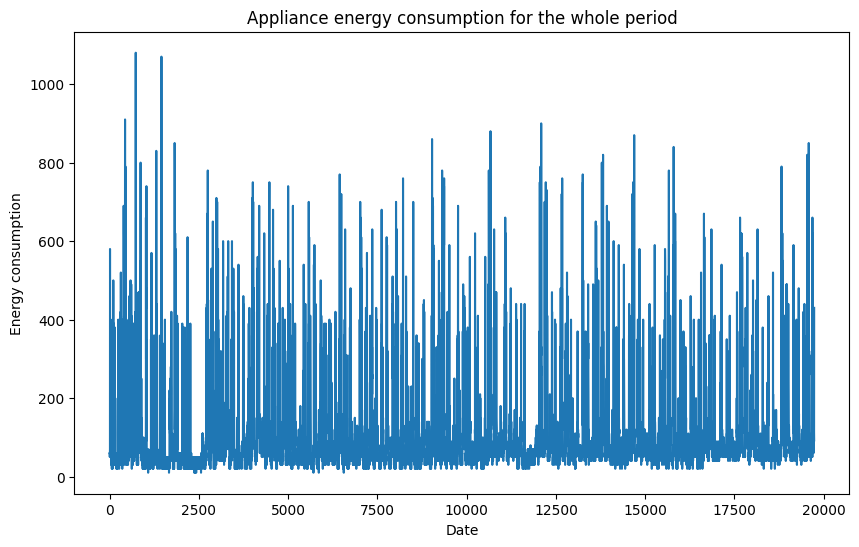

In [4]:
import numpy as np
import matplotlib.pyplot as plt
#df_first_24_hours = df.loc['2016-01-01 00:00:00':'2016-01-01 23:59:59', :]

plt.figure(figsize=(10,6))
#plt.plot(indexes , timedata.column(3))
#x=(1:19735)

plt.plot( df['Appliances'], label='Appliances')

plt.xlabel('Date')
plt.ylabel('Energy consumption')
plt.title('Appliance energy consumption for the whole period')
plt.show()



  

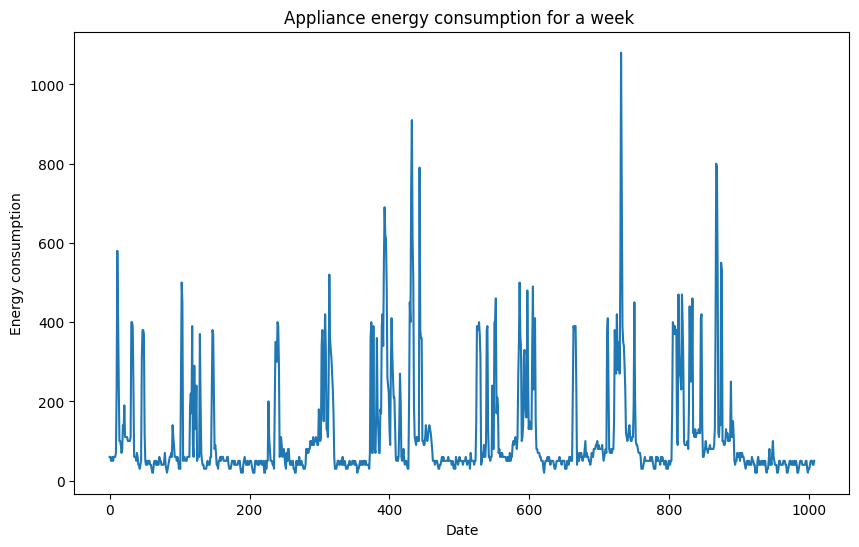

In [5]:
import numpy as np
import matplotlib.pyplot as plt
#df_first_24_hours = df.loc['2016-01-01 00:00:00':'2016-01-01 23:59:59', :]

plt.figure(figsize=(10,6))
#plt.plot(indexes , timedata.column(3))
#x=(1:19735)

plt.plot( df['Appliances'][0:7*24*6], label='Appliances')

plt.xlabel('Date')
plt.ylabel('Energy consumption')
plt.title('Appliance energy consumption for a week ')
plt.show()

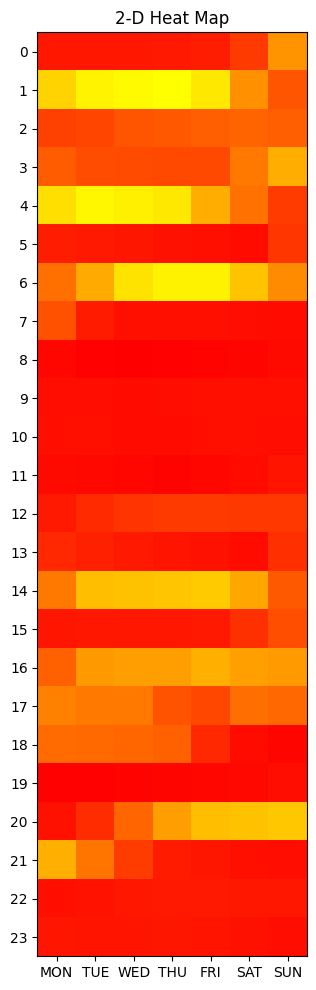

In [17]:
df_hourly = df['Appliances'].rolling(window=6).mean()[5:]
# 
data = df_hourly[0:24*7].values.reshape(24,7)
plt.figure(figsize=(6,12))
plt.imshow( data, cmap='autumn' )
plt.yticks(ticks=range(24),labels=range(24))
plt.xticks(ticks=range(7),labels=['MON','TUE','WED','THU', 'FRI' ,'SAT', 'SUN'])
plt.title( "2-D Heat Map" )
plt.show()

# import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
energy_data = pd.read_csv('energydata_complete.csv', sep=',')

# Create a new DataFrame with hourly consumption of appliances
appliances_hourly = energy_data['Appliances'].resample('1H').sum()

# Create a heatmap of hourly consumption for a week
plt.figure(figsize=(10, 6))
plt.imshow(appliances_hourly[0:24*7].values.reshape(7, 24), cmap='hot')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.colorbar()
plt.title('Heatmap of Hourly Consumption of Appliances for a Week')
plt.show()

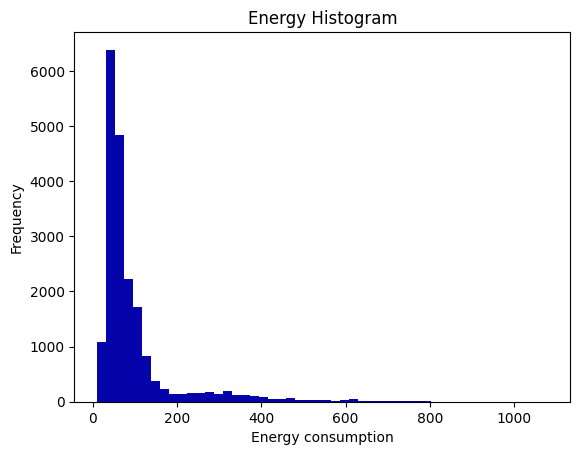

In [24]:
plt.hist(df['Appliances'].values, bins=50, color='#0504aa')
plt.title('Energy Histogram')
plt.xlabel('Energy consumption')
plt.ylabel('Frequency')
plt.show()

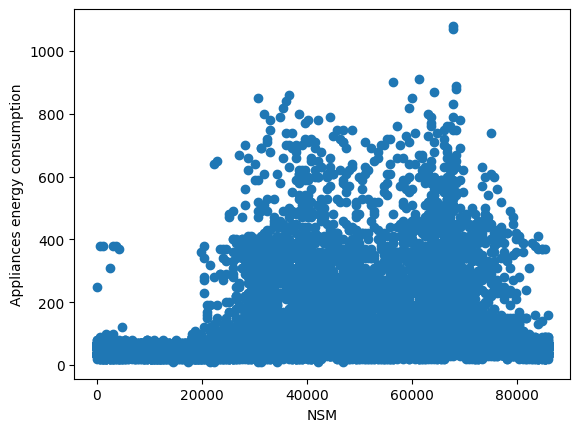

In [31]:
df['date']=pd.to_datetime(df['date'])
df['NSM']=df['date'].dt.hour*3600+df['date'].dt.minute*60+df['date'].dt.second
plt.scatter(df['NSM'], df['Appliances'])
plt.xlabel('NSM')
plt.ylabel('Appliances energy consumption')
plt.show()

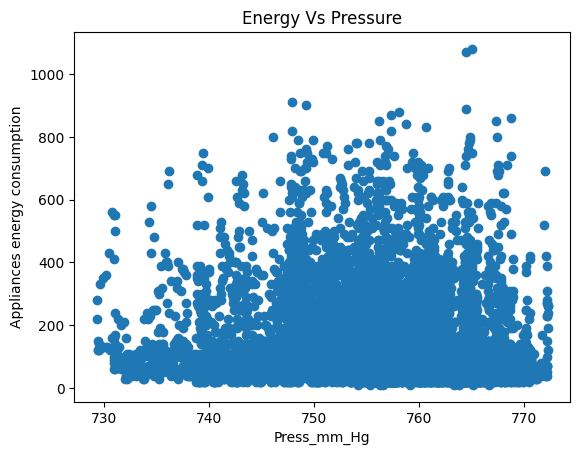

In [34]:

plt.scatter(df['Press_mm_hg'], df['Appliances'])
plt.title('Energy Vs Pressure')
plt.xlabel('Press_mm_Hg')
plt.ylabel('Appliances energy consumption')
plt.show()

In [35]:
df.corr()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM
date,1.000000,-0.009630,-0.189835,0.696974,-0.102760,0.515321,-0.092945,0.792938,-0.431939,0.781954,...,-0.244647,0.588861,-0.026770,-0.336362,-0.257415,-0.096214,0.468731,0.000277,0.000277,-0.001253
Appliances,-0.009630,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,...,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145,0.217152
lights,-0.189835,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,...,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521,0.254993
T1,0.696974,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,...,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203,0.178728
RH_1,-0.102760,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,...,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699,0.018531
T2,0.515321,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,...,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087,0.254569
RH_2,-0.092945,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,...,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275,-0.183182
T3,0.792938,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,...,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194,0.037607
RH_3,-0.431939,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,...,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477,-0.052343
T4,0.781954,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,...,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815,0.088334


In [41]:
columns = ['Frequency(Hz)', 'Angle of attack', 'Chord Length', 'Free-Stream Velocity', 'Suction side thickness', 'scaled sound pressure level']
data=pd.read_csv('/home/exouser/ME592_Spring2024/01_Intro/hw#1/airfoil_self_noise.dat',delimiter='\t', names=columns)

In [42]:
data.head()

,Frequency(Hz),Angle of attack,Chord Length,Free-Stream Velocity,Suction side thickness,scaled sound pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [43]:
data.describe()

,Frequency(Hz),Angle of attack,Chord Length,Free-Stream Velocity,Suction side thickness,scaled sound pressure level
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [45]:
range_of_plevel= data['scaled sound pressure level'].max() - data['scaled sound pressure level'].min()
range_of_plevel

37.607

In [47]:
kurtosis = data['scaled sound pressure level'].kurtosis()
kurtosis

-0.31418730019313834

In [49]:
skewness = data['scaled sound pressure level'].skew()
skewness

-0.4189521877346853

In [51]:
# from the descibe table we have the following
print("Mean is :124.835943")
print("Median is:125.721000" )
print("Standard Deviation:6.898657"  )
print("Range is:",range_of_plevel)
print("Kurtosis is:",kurtosis)
print("Skewness is:",skewness)

Mean is :124.835943
Median is:125.721000
Standard Deviation:6.898657
Range is: 37.607
Kurtosis is: -0.31418730019313834
Skewness is: -0.4189521877346853


In [52]:
!pwd


/home/exouser/ME592_Spring2024/01_Intro/hw#1
